# Import library

In [46]:
import pandas as pd
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import container
import seaborn as sns
import glob
import json
from matplotlib.colors import LogNorm
import copy
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

from matplotlib import rc
import plotly.express as px



In [47]:
from matplotlib.patches import PathPatch

def adjust_box_widths(ax, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    #for ax in g.axes:

        # iterating through axes artists:
    for c in ax.get_children():

        # searching for PathPatches
        if isinstance(c, PathPatch):
            # getting current width of box:
            p = c.get_path()
            verts = p.vertices
            verts_sub = verts[:-1]
            xmin = np.min(verts_sub[:, 0])
            xmax = np.max(verts_sub[:, 0])
            xmid = 0.5*(xmin+xmax)
            xhalf = 0.5*(xmax - xmin)

            # setting new width of box
            xmin_new = xmid-fac*xhalf
            xmax_new = xmid+fac*xhalf
            verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
            verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

            # setting new width of median line
            for l in ax.lines:
                if np.all(l.get_xdata() == [xmin, xmax]):
                    l.set_xdata([xmin_new, xmax_new])

In [48]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)
        

def latexify(fig_width=None, fig_height=None, columns=1, largeFonts=False, font_scale=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1, 2])

    if fig_width is None:
        fig_width = 3.39 if columns == 1 else 6.9  # width in inches

    if fig_height is None:
        golden_mean = (np.sqrt(5) - 1.0) / 2.0    # Aesthetic ratio
        fig_height = fig_width * golden_mean  # height in inches

    MAX_HEIGHT_INCHES = 28.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height +
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'axes.labelsize': font_scale * 10 if largeFonts else font_scale * 7,
              'axes.titlesize': font_scale * 10 if largeFonts else font_scale * 7,
              'font.size': font_scale * 10 if largeFonts else font_scale * 7,  # was 10
              'legend.fontsize': font_scale * 10 if largeFonts else font_scale * 7,  # was 10
              'xtick.labelsize': font_scale * 10 if largeFonts else font_scale * 7,
              'ytick.labelsize': font_scale * 10 if largeFonts else font_scale * 7,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'serif',
              'xtick.minor.size': 0.5,
              'xtick.major.pad': 1.5,
              'xtick.major.size': 1,
              'ytick.minor.size': 0.5,
              'ytick.major.pad': 1.5,
              'ytick.major.size': 1,
              'lines.linewidth': 1.5,
              'lines.markersize': 0.1,
              'hatch.linewidth': 0.5
              }

    matplotlib.rcParams.update(params)
    plt.rcParams.update(params)
    
    
import colorsys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def alter(alist, col, factor=1.1):
    tmp = np.array(alist)
    tmp[:,col] = tmp[:,col] * factor
    tmp[tmp > 1] = 1
    tmp[tmp < 0] = 0
    
    new = []
    for row in tmp.tolist():
        new.append(tuple(row))
        
    return new
    

def rgb2hls(alist):
    alist = alist[:]
    for i, row in enumerate(alist):
        hls = colorsys.rgb_to_hls(row[0], row[1], row[2])
        alist[i] = hls
    return alist


def hls2rgb(alist):
    alist = alist[:]
    for i, row in enumerate(alist):
        hls = colorsys.hls_to_rgb(row[0], row[1], row[2])
        alist[i] = hls
    return alist


def lighten(alist, increase=0.2):
    factor = 1 + increase
    hls = rgb2hls(alist)
    new = alter(hls, 1, factor=factor)
    rgb = hls2rgb(new)
    return rgb


def darken(alist, decrease=0.2):
    factor = 1 - decrease
    hls = rgb2hls(alist)
    new = alter(hls, 1, factor=factor)
    rgb = hls2rgb(new)
    return rgb


def saturate(alist, increase=0.2):
    factor = 1 + increase
    hls = rgb2hls(alist)
    new = alter(hls, 2, factor=factor)
    rgb = hls2rgb(new)
    return rgb
    

def desaturate(alist, decrease=0.2):
    factor = 1 - decrease
    hls = rgb2hls(alist)
    new = alter(hls, 2, factor=factor)
    rgb = hls2rgb(new)
    return rgb

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

def scale(arr_rgb, scale_l):
    return [scale_lightness(x, scale_l) for x in arr_rgb]


In [49]:
"""Load configuration"""
with open("/home/trduong/Data/counterfactual_fairness_game_theoric/configuration.yml", 'r') as stream:
    try:
        conf = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

# Law dataset

## Evaluation

In [195]:
df_evaluate = pd.read_csv(conf['result_evaluate_law'])

In [196]:
df_evaluate

method    RMSE     MAE  sinkhorn  energy  gaussian  laplacian  \
0        full_linear  0.9616  0.7824    0.6135  0.8677    0.7192     0.5308   
1           full_net  1.0922  0.8732    0.5352  0.2538    0.1826     0.1597   
2     unaware_linear  0.9840  0.7966    0.1088  0.1970    0.1847     0.1525   
3        unaware_net  1.1102  0.8816    0.0184  0.0243    0.0184     0.0215   
4    level2_lin_True  1.0626  0.8518    0.0216  0.0143    0.0095     0.0179   
5   level2_lin_False  1.0342  0.8315    0.0158  0.0208    0.0185     0.0210   
6    level3_lin_True  1.3985  1.0852    0.0694  0.0205    0.0083     0.0143   
7   level3_lin_False  1.0614  0.8531    0.0294  0.0073    0.0053     0.0093   
8      AL_prediction  0.9218  0.7476    1.0164  0.9064    0.5131     0.3729   
9      GL_prediction  0.9641  0.7836    0.2381  0.2629    0.1962     0.1483   
10     GD_prediction  1.0369  0.8369    0.0000  0.0001    0.0000     0.0001   

     R2score  
0   0.137510  
1  -0.112830  
2   0.096726  
3  -0.149736  
4  -0.053214  
5   0.002336  
6  -0.824316  
7  -0.050810  
8   0.207318  
9   0.133047  
10 -0.002935

In [178]:
df_evaluate.columns

Index(['method', 'RMSE', 'MAE', 'sinkhorn', 'energy', 'gaussian', 'laplacian',
       'R2score'],
      dtype='object')

In [179]:
df_evaluate.method.unique()

array(['full_linear', 'full_net', 'unaware_linear', 'unaware_net',
       'level2_lin_True', 'level2_lin_False', 'level3_lin_True',
       'level3_lin_False', 'AL_prediction', 'GL_prediction',
       'GD_prediction'], dtype=object)

In [180]:
methods = ['full_linear', 'full_net',
          'unaware_linear', 'unaware_net',
          'level2_lin_True','level2_lin_False',
          'level3_lin_True', 'level3_lin_False',
          'AL_prediction','GL_prediction', 
          'GD_prediction']

In [181]:
df_evaluate[df_evaluate.method.isin(methods)]

method    RMSE     MAE  sinkhorn  energy  gaussian  laplacian  \
0        full_linear  0.9616  0.7824    0.6135  0.8677    0.7192     0.5308   
1           full_net  1.0922  0.8732    0.5352  0.2538    0.1826     0.1597   
2     unaware_linear  0.9840  0.7966    0.1088  0.1970    0.1847     0.1525   
3        unaware_net  1.1102  0.8816    0.0184  0.0243    0.0184     0.0215   
4    level2_lin_True  1.0626  0.8518    0.0216  0.0143    0.0095     0.0179   
5   level2_lin_False  1.0342  0.8315    0.0158  0.0208    0.0185     0.0210   
6    level3_lin_True  1.3985  1.0852    0.0694  0.0205    0.0083     0.0143   
7   level3_lin_False  1.0614  0.8531    0.0294  0.0073    0.0053     0.0093   
8      AL_prediction  0.9218  0.7476    1.0164  0.9064    0.5131     0.3729   
9      GL_prediction  0.9568  0.7750    0.2410  0.2607    0.1822     0.1375   
10     GD_prediction  1.0325  0.8329    0.0001  0.0064    0.0005     0.0123   

     R2score  
0   0.137510  
1  -0.112830  
2   0.096726  
3  -0.149736  
4  -0.053214  
5   0.002336  
6  -0.824316  
7  -0.050810  
8   0.207318  
9   0.146050  
10  0.005490

In [182]:
df_evaluate.round(4).to_csv(conf['result_evaluate_law'])

In [183]:
print(df_evaluate.round(4).to_latex(index=False)) 

\begin{tabular}{lrrrrrrr}
\toprule
           method &    RMSE &     MAE &  sinkhorn &  energy &  gaussian &  laplacian &  R2score \\
\midrule
      full\_linear &  0.9616 &  0.7824 &    0.6135 &  0.8677 &    0.7192 &     0.5308 &   0.1375 \\
         full\_net &  1.0922 &  0.8732 &    0.5352 &  0.2538 &    0.1826 &     0.1597 &  -0.1128 \\
   unaware\_linear &  0.9840 &  0.7966 &    0.1088 &  0.1970 &    0.1847 &     0.1525 &   0.0967 \\
      unaware\_net &  1.1102 &  0.8816 &    0.0184 &  0.0243 &    0.0184 &     0.0215 &  -0.1497 \\
  level2\_lin\_True &  1.0626 &  0.8518 &    0.0216 &  0.0143 &    0.0095 &     0.0179 &  -0.0532 \\
 level2\_lin\_False &  1.0342 &  0.8315 &    0.0158 &  0.0208 &    0.0185 &     0.0210 &   0.0023 \\
  level3\_lin\_True &  1.3985 &  1.0852 &    0.0694 &  0.0205 &    0.0083 &     0.0143 &  -0.8243 \\
 level3\_lin\_False &  1.0614 &  0.8531 &    0.0294 &  0.0073 &    0.0053 &     0.0093 &  -0.0508 \\
    AL\_prediction &  0.9218 &  0.7476 &    1.0164 & 

In [184]:
from IPython.display import Markdown, display
display(Markdown(df_evaluate.to_markdown()))

|    | method           |   RMSE |    MAE |   sinkhorn |   energy |   gaussian |   laplacian |     R2score |
|---:|:-----------------|-------:|-------:|-----------:|---------:|-----------:|------------:|------------:|
|  0 | full_linear      | 0.9616 | 0.7824 |     0.6135 |   0.8677 |     0.7192 |      0.5308 |  0.13751    |
|  1 | full_net         | 1.0922 | 0.8732 |     0.5352 |   0.2538 |     0.1826 |      0.1597 | -0.11283    |
|  2 | unaware_linear   | 0.984  | 0.7966 |     0.1088 |   0.197  |     0.1847 |      0.1525 |  0.0967262  |
|  3 | unaware_net      | 1.1102 | 0.8816 |     0.0184 |   0.0243 |     0.0184 |      0.0215 | -0.149736   |
|  4 | level2_lin_True  | 1.0626 | 0.8518 |     0.0216 |   0.0143 |     0.0095 |      0.0179 | -0.0532144  |
|  5 | level2_lin_False | 1.0342 | 0.8315 |     0.0158 |   0.0208 |     0.0185 |      0.021  |  0.00233559 |
|  6 | level3_lin_True  | 1.3985 | 1.0852 |     0.0694 |   0.0205 |     0.0083 |      0.0143 | -0.824316   |
|  7 | level3_lin_False | 1.0614 | 0.8531 |     0.0294 |   0.0073 |     0.0053 |      0.0093 | -0.0508099  |
|  8 | AL_prediction    | 0.9218 | 0.7476 |     1.0164 |   0.9064 |     0.5131 |      0.3729 |  0.207318   |
|  9 | GL_prediction    | 0.9568 | 0.775  |     0.241  |   0.2607 |     0.1822 |      0.1375 |  0.14605    |
| 10 | GD_prediction    | 1.0325 | 0.8329 |     0.0001 |   0.0064 |     0.0005 |      0.0123 |  0.00549029 |

In [185]:
# method_name = {
#     "full_prediction" : "Full model",
#     "unaware_prediction" : "Unawareness model",
#     "cf_prediction" : "Counterfactual Fairness model",
#     "inv_prediction": "Invariant model"
    
# }

In [186]:
# df['method'] = df['method'].map(method_name)

## Read data

In [191]:
df_baseline = pd.read_csv(conf["result_law_baseline"])

In [192]:
df_ivr = pd.read_csv(conf["result_ivr_law"])

In [193]:
df_ivr

LSAT  UGPA  sex  race      ZFYA  AL_prediction  GL_prediction  \
0     43.0   4.0    1     1  2.353094       1.348752       1.502716   
1     46.0   3.2    1     1 -0.481275       0.295303       0.210419   
2     25.0   3.6    1     1 -0.849093      -0.460312      -0.849625   
3     37.0   2.9    1     1 -0.968094      -0.096493      -0.141327   
4     35.0   3.7    0     1 -0.686820       0.240984       0.153015   
...    ...   ...  ...   ...       ...            ...            ...   
1952  43.0   4.0    1     1  0.524818       1.348763       1.502716   
1953  37.0   3.5    1     1  0.211090       0.242579       0.300034   
1954  30.0   3.8    0     0 -2.277096      -0.830933      -0.528717   
1955  39.0   3.0    1     1  0.362545       0.149572       0.027039   
1956  41.0   3.3    0     1  0.514000      -0.157429       0.088684   

      GD_prediction  
0          0.030360  
1          0.007432  
2         -0.004124  
3         -0.003233  
4          0.010062  
...             ...  
1952       0.030360  
1953       0.008757  
1954       0.002944  
1955      -0.000855  
1956       0.008242  

[1957 rows x 8 columns]

In [194]:
df_baseline.columns

Index(['Unnamed: 0', 'race', 'sex', 'LSAT', 'UGPA', 'region_first', 'ZFYA',
       'sander_index', 'first_pf', 'full_linear', 'full_net', 'unaware_linear',
       'unaware_net', 'level2_lin_True', 'level2_lin_False', 'level3_lin_True',
       'level3_lin_False'],
      dtype='object')

## Visualization

In [15]:
def plot_distribution(df, x_value, y_value, alpha, linewidth, ax):
    sns.kdeplot(data=df, x=x_value, hue=y_value,fill=True, 
            common_norm=False, palette=palette,alpha=alpha, linewidth=linewidth,ax=ax)


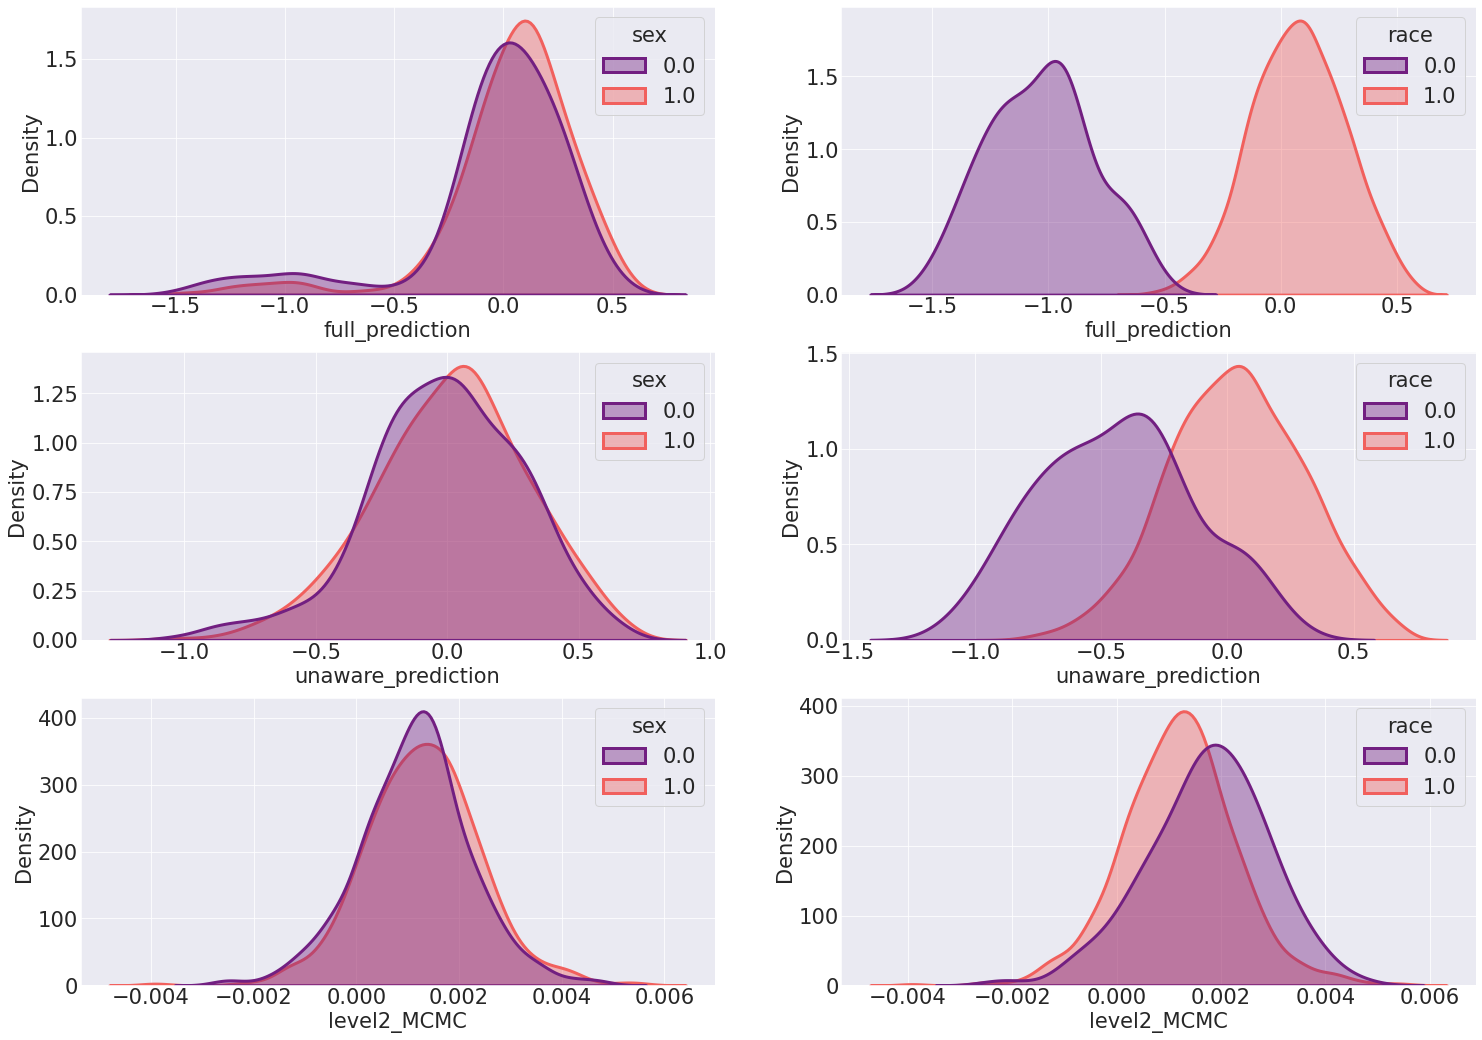

In [16]:
sns.set_context(rc={'lines.markeredgewidth': 0.1})

latexify(25,18, font_scale=3)

sns.plotting_context("poster", rc={"lines.linewidth": 40})
sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=3, ncols=2)

ax1, ax2, ax3, ax4, ax5, ax6 = axes[0,0], axes[0,1], axes[1,0], axes[1,1], axes[2,0], axes[2,1]

alpha = 0.4
linewidth = 3
palette = "magma"



axes = [ax1, ax2, ax3, ax4, ax5, ax6]

plot_distribution(df_baseline, "full_prediction", "sex", alpha, linewidth, ax1)
plot_distribution(df_baseline, "full_prediction", "race", alpha, linewidth, ax2)
plot_distribution(df_baseline, "unaware_prediction", "sex", alpha, linewidth, ax3)
plot_distribution(df_baseline, "unaware_prediction", "race", alpha, linewidth, ax4)
plot_distribution(df_baseline, "level2_MCMC", "sex", alpha, linewidth, ax5)
plot_distribution(df_baseline, "level2_MCMC", "race", alpha, linewidth, ax6)

In [17]:
df_baseline

Unnamed: 0  race  sex      LSAT      UGPA region_first      ZFYA  \
0           5721   1.0  1.0  1.123711  1.851186           MW  2.353094   
1          16803   1.0  1.0  1.685396 -0.086709           NE -0.481275   
2          20533   1.0  1.0 -2.246400  0.882239           Mt -0.849093   
3          18141   1.0  1.0  0.000341 -0.813419           SC -0.968094   
4            996   1.0  0.0 -0.374116  1.124476           GL -0.686820   
...          ...   ...  ...       ...       ...          ...       ...   
1952       15318   1.0  1.0  1.123711  1.851186           SC  0.524818   
1953       26676   1.0  1.0  0.000341  0.640002           FW  0.211090   
1954       20264   0.0  0.0 -1.310258  1.366713           MS -2.277096   
1955       23287   1.0  1.0  0.374797 -0.571182           GL  0.362545   
1956       23794   1.0  0.0  0.749254  0.155528           GL  0.514000   

      sander_index  first_pf  full_prediction  unaware_prediction  \
0         0.918452       1.0         0.440662            0.495471   
1         0.879762       1.0         0.348189            0.394759   
2         0.655357       0.0        -0.241747           -0.430404   
3         0.738690       0.0        -0.016809           -0.097604   
4         0.789881       1.0         0.078950            0.048006   
...            ...       ...              ...                 ...   
1952      0.918452       1.0         0.440662            0.495471   
1953      0.795833       1.0         0.125950            0.078951   
1954      0.736905       0.0        -0.811053           -0.147060   
1955      0.773214       1.0         0.072233            0.021619   
1956      0.826786       1.0         0.179523            0.199693   

      level2_MCMC  level2_Importance  level3_MCMC  level3_Importance  
0       -0.000356           0.217214     0.170104           0.027231  
1        0.002936          -0.000781     0.062863           0.093670  
2        0.000180           0.130404    -0.203369           0.009514  
3        0.002356          -0.091849    -0.013285          -0.062295  
4        0.001046          -0.033643    -0.072492           0.146773  
...           ...                ...          ...                ...  
1952    -0.001090           0.121739     0.101876           0.034747  
1953     0.002229           0.049028     0.082890          -0.016276  
1954     0.000005          -0.015616    -0.165513           0.002384  
1955     0.001037           0.060856    -0.016280          -0.068279  
1956     0.002984           0.013275     0.167607           0.072678  

[1957 rows x 15 columns]

In [18]:
df_ivr

LSAT      UGPA  sex  race      ZFYA  AL_prediction  GL_prediction  \
0     1.123711  1.851186    1     1  2.353094       1.183158       1.390808   
1     1.685396 -0.086709    1     1 -0.481275       0.197219       0.505798   
2    -2.246400  0.882239    1     1 -0.849093      -0.675278      -0.621155   
3     0.000341 -0.813419    1     1 -0.968094      -0.165360      -0.098450   
4    -0.374116  1.124476    0     1 -0.686820       0.465965       0.148621   
...        ...       ...  ...   ...       ...            ...            ...   
1952  1.123711  1.851186    1     1  0.524818       1.183158       1.390808   
1953  0.000341  0.640002    1     1  0.211090       0.090816       0.351624   
1954 -1.310258  1.366713    0     0 -2.277096      -0.816411      -0.431946   
1955  0.374797 -0.571182    1     1  0.362545       0.250938       0.027466   
1956  0.749254  0.155528    0     1  0.514000      -0.198910       0.167053   

      GD_prediction  
0         -0.026544  
1         -0.121433  
2         -0.205507  
3         -0.194845  
4         -0.057116  
...             ...  
1952      -0.026544  
1953      -0.094263  
1954      -0.114980  
1955      -0.193864  
1956      -0.108179  

[1957 rows x 8 columns]

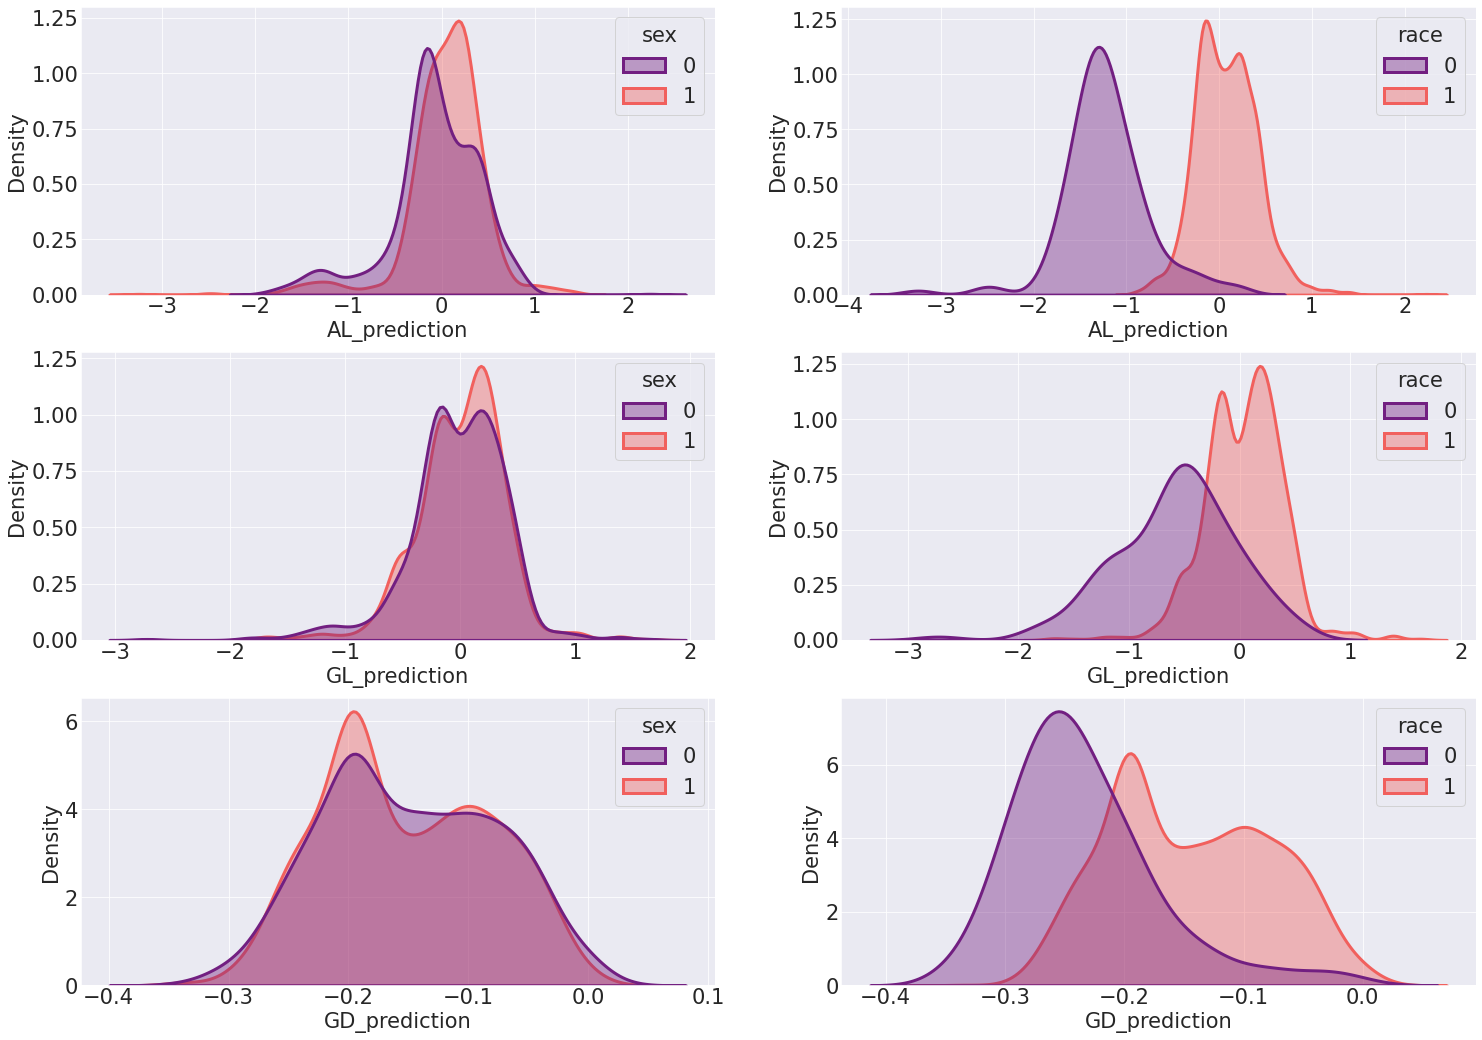

In [19]:
latexify(25,18, font_scale=3)
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.plotting_context("poster", rc={"lines.linewidth": 40})
sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=3, ncols=2)
ax1, ax2, ax3, ax4, ax5, ax6 = axes[0,0], axes[0,1], axes[1,0], axes[1,1], axes[2,0], axes[2,1]

alpha = 0.4
linewidth = 3
palette = "magma"

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

plot_distribution(df_ivr, "AL_prediction", "sex", alpha, linewidth, ax1)
plot_distribution(df_ivr, "AL_prediction", "race", alpha, linewidth, ax2)
plot_distribution(df_ivr, "GL_prediction", "sex", alpha, linewidth, ax3)
plot_distribution(df_ivr, "GL_prediction", "race", alpha, linewidth, ax4)
plot_distribution(df_ivr, "GD_prediction", "sex", alpha, linewidth, ax5)
plot_distribution(df_ivr, "GD_prediction", "race", alpha, linewidth, ax6)

In [20]:
from geomloss import SamplesLoss
import torch 
backend = "auto"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
df_ivr.head()

LSAT      UGPA  sex  race      ZFYA  AL_prediction  GL_prediction  \
0  1.123711  1.851186    1     1  2.353094       1.183158       1.390808   
1  1.685396 -0.086709    1     1 -0.481275       0.197219       0.505798   
2 -2.246400  0.882239    1     1 -0.849093      -0.675278      -0.621155   
3  0.000341 -0.813419    1     1 -0.968094      -0.165360      -0.098450   
4 -0.374116  1.124476    0     1 -0.686820       0.465965       0.148621   

   GD_prediction  
0      -0.026544  
1      -0.121433  
2      -0.205507  
3      -0.194845  
4      -0.057116

In [22]:
R1_ivr = df_ivr[df_ivr['race'] == 1]
R0_ivr = df_ivr[df_ivr['race'] == 0]

R1_baseline = df_baseline[df_baseline['race'] == 1]
R0_baseline = df_baseline[df_baseline['race'] == 0]

In [24]:
# ys = R1_ivr["GD_prediction"].values
# ys_hat = R0_ivr["GD_prediction"].values

# ys = torch.Tensor(ys).to(device).reshape(-1,1)
# ys_hat = torch.Tensor(ys_hat).to(device).reshape(-1,1)

# Loss = SamplesLoss("sinkhorn", p=2, blur=0.05, scaling=0.95, backend = backend)
# print(Loss(ys, ys_hat).cpu().detach().numpy()) 
 
    
# ys = R1_baseline["cf_prediction"].values
# ys_hat = R0_baseline["cf_prediction"].values

# ys = torch.Tensor(ys).to(device).reshape(-1,1)
# ys_hat = torch.Tensor(ys_hat).to(device).reshape(-1,1)

# Loss = SamplesLoss("sinkhorn", p=2, blur=0.05, scaling=0.95, backend = backend)
# print(Loss(ys, ys_hat).cpu().detach().numpy())

In [25]:
df_baseline.columns

Index(['Unnamed: 0', 'race', 'sex', 'LSAT', 'UGPA', 'region_first', 'ZFYA',
       'sander_index', 'first_pf', 'full_prediction', 'unaware_prediction',
       'level2_MCMC', 'level2_Importance', 'level3_MCMC', 'level3_Importance'],
      dtype='object')

In [30]:
# [{'label': year, 'value': str(year)}
#                           for year in range(1974, 2019)]

In [28]:
fig = px.histogram(df_baseline, x="full_prediction", color="race",
                   marginal="box", # or violin, rug
                   hover_data=df_baseline.columns)

fig.show()


In [34]:
R0_ivr

LSAT      UGPA  sex  race      ZFYA  AL_prediction  GL_prediction  \
22   -2.433628  0.155528    0     0 -1.498185      -1.397805      -1.118591   
27   -1.497486  0.882239    0     0 -0.394729      -1.466633      -0.522766   
48   -2.433628  0.397765    0     0 -0.557002      -1.354138      -1.233032   
61   -1.497486 -0.571182    1     0 -0.200002      -1.594773      -0.396118   
81   -3.556998 -0.571182    0     0 -0.200002      -0.138436      -1.139954   
...        ...       ...  ...   ...       ...            ...            ...   
1841 -2.995313 -2.751314    0     0 -2.093186      -1.835358      -2.721863   
1854 -1.871943 -2.266841    1     0 -0.427184      -1.310685      -0.832092   
1891 -1.871943 -0.571182    1     0 -1.422458      -1.578003      -0.526062   
1929 -0.561344 -0.328945    0     0 -2.244641      -1.680859      -0.129700   
1954 -1.310258  1.366713    0     0 -2.277096      -0.816411      -0.431946   

      GD_prediction  
22        -0.256173  
27        -0.174485  
48        -0.242657  
61        -0.261950  
81        -0.313827  
...             ...  
1841      -0.342691  
1854      -0.277321  
1891      -0.269366  
1929      -0.214824  
1954      -0.114980  

[128 rows x 8 columns]

In [42]:
hist_data

[[-1.3978046999999998,
  -1.4666333,
  -1.3541379,
  -1.5947728,
  -0.13843584,
  -1.441937,
  -0.9138646,
  -1.4325261,
  -1.15836,
  -1.233563,
  -1.3717198,
  -1.8870702000000001,
  -2.4500966,
  -1.3150411,
  -1.4165691999999999,
  -0.6494831999999999,
  -1.3322453,
  -0.31993914,
  -0.8568425,
  -0.79837084,
  -1.3286632999999999,
  -1.0480618,
  -1.1245923,
  -0.10924578,
  -1.2247663,
  -1.3179212,
  -1.2639011999999998,
  -0.95776415,
  -0.89886904,
  -1.2392087,
  -1.2324184999999999,
  -1.4319997,
  -1.1769795,
  -0.92978716,
  -0.72969484,
  -0.96505785,
  -0.8940358,
  -1.5116696000000003,
  -0.27975512,
  -1.0516133,
  -1.013783,
  -1.0209126,
  -1.4373174,
  -1.4117627000000001,
  -1.1908536,
  -3.2440189999999998,
  -1.2292981,
  -0.49182939999999997,
  -2.5146222000000003,
  -1.4247594,
  0.15705824,
  -1.521687,
  -1.2416615,
  -1.6751599,
  -1.2999501,
  -1.194634,
  -1.5422444,
  -1.2638516000000002,
  -1.2435651,
  -1.6808591,
  -1.255837,
  -0.9824299999999999,
  -

In [41]:
import plotly.figure_factory as ff

hist_data = [R0_ivr.AL_prediction.values.tolist(), R1_ivr.AL_prediction.values.tolist()]
group_labels  = ['race 0', 'race 1']
# colors = ['#333F44', '#37AA9C']
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig.show()

In [46]:
fig = ff.create_distplot([df_baseline[c] for c in ['full_prediction', 'unaware_prediction']], ['full_prediction', 'unaware_prediction'])
fig.show()

# Adult dataset

In [82]:
adult_evaluate = pd.read_csv(conf['result_evaluate_adult'])

In [83]:
adult_evaluate

method  Accuracy  F1 Score  Precision    Recall  \
0     full_prediction  0.778232  0.748618   0.750736  0.778232   
1  unaware_prediction  0.751144  0.698261   0.696656  0.751144   
2       AL_prediction  0.831608  0.824062   0.822564  0.831608   
3       GL_prediction  0.817665  0.800068   0.804723  0.817665   
4       GD_prediction  0.817604  0.798531   0.804997  0.817604   

   average_abs_odds_difference_race    energy  \
0                          0.119918  0.019428   
1                          0.025321  0.002418   
2                          0.090705  0.014621   
3                          0.014338  0.008014   
4                          0.012188  0.009701   

   equal_opportunity_difference_race  gaussian  \
0                          -0.187453  0.015861   
1                          -0.032260  0.001570   
2                          -0.145186  0.013026   
3                          -0.017649  0.006663   
4                          -0.014672  0.007543   

   generalized_entropy_index_race  laplacian  sinkhorn  \
0                        0.134288   0.023655  0.006928   
1                        0.159002   0.003389  0.000672   
2                        0.092298   0.015660  0.008496   
3                        0.106074   0.009503  0.005043   
4                        0.106776   0.010169  0.011524   

   true_positive_rate_difference_race  
0                           -0.187453  
1                           -0.032260  
2                           -0.145186  
3                           -0.017649  
4                           -0.014672

In [77]:
adult_evaluate.drop(columns = ['sinkhorn', 'energy', 'gaussian', 'laplacian']).round(4)

method  Accuracy  F1 Score  Precision  Recall  \
0     full_prediction    0.7782    0.7486     0.7507  0.7782   
1  unaware_prediction    0.7511    0.6983     0.6967  0.7511   
2       AL_prediction    0.8316    0.8241     0.8226  0.8316   
3       GL_prediction    0.8177    0.8001     0.8047  0.8177   
4       GD_prediction    0.8176    0.7985     0.8050  0.8176   

   average_abs_odds_difference_race  equal_opportunity_difference_race  \
0                            0.1199                            -0.1875   
1                            0.0253                            -0.0323   
2                            0.0907                            -0.1452   
3                            0.0143                            -0.0176   
4                            0.0122                            -0.0147   

   generalized_entropy_index_race  true_positive_rate_difference_race  
0                          0.1343                             -0.1875  
1                          0.1590                             -0.0323  
2                          0.0923                             -0.1452  
3                          0.1061                             -0.0176  
4                          0.1068                             -0.0147

In [78]:
print(adult_evaluate.drop(columns = ['sinkhorn', 'energy', 'gaussian', 'laplacian']).round(4).to_latex())

\begin{tabular}{llrrrrrrrr}
\toprule
{} &              method &  Accuracy &  F1 Score &  Precision &  Recall &  average\_abs\_odds\_difference\_race &  equal\_opportunity\_difference\_race &  generalized\_entropy\_index\_race &  true\_positive\_rate\_difference\_race \\
\midrule
0 &     full\_prediction &    0.7782 &    0.7486 &     0.7507 &  0.7782 &                            0.1199 &                            -0.1875 &                          0.1343 &                             -0.1875 \\
1 &  unaware\_prediction &    0.7511 &    0.6983 &     0.6967 &  0.7511 &                            0.0253 &                            -0.0323 &                          0.1590 &                             -0.0323 \\
2 &       AL\_prediction &    0.8316 &    0.8241 &     0.8226 &  0.8316 &                            0.0907 &                            -0.1452 &                          0.0923 &                             -0.1452 \\
3 &       GL\_prediction &    0.8177 &    0.8001 &     0.804

In [24]:
adult_baseline = pd.read_csv(conf['result_adult'])
adult_ivr = pd.read_csv(conf['result_ivr_adult'])


In [25]:
adult_baseline

age  workclass  education  marital_status  occupation  race  \
0      0.030670          0          1               3           5     1   
1      0.837096          3          1               1           5     1   
2     -0.042641          2          3               0           0     1   
3      1.057031          2          6               1           0     0   
4     -0.775756          2          1               1           2     0   
...         ...        ...        ...             ...         ...   ...   
32556 -0.849067          2          0               1           4     1   
32557  0.103982          2          3               1           0     1   
32558  1.423588          2          3               4           5     1   
32559 -1.215625          2          3               3           5     1   
32560  0.983719          3          3               1           5     1   

       gender  hours_per_week  income  full_prediction  full_prediction_proba  \
0           1       -0.035429       0                0               0.667676   
1           1       -2.222119       0                0               0.654120   
2           1       -0.035429       0                0               0.684951   
3           1       -0.035429       0                0               0.814800   
4           0       -0.035429       0                0               0.927155   
...       ...             ...     ...              ...                    ...   
32556       0       -0.197406       0                0               0.851885   
32557       1       -0.035429       1                0               0.757597   
32558       0       -0.035429       0                0               0.892778   
32559       1       -1.655199       0                0               0.915935   
32560       0       -0.035429       1                0               0.749953   

       unaware_prediction  unaware_prediction_proba  
0                       0                  0.836918  
1                       0                  0.838550  
2                       0                  0.742993  
3                       0                  0.724171  
4                       0                  0.830464  
...                   ...                       ...  
32556                   0                  0.810984  
32557                   0                  0.805772  
32558                   0                  0.809004  
32559                   0                  0.959448  
32560                   0                  0.594500  

[32561 rows x 13 columns]

In [26]:
adult_ivr

age  workclass  education  marital_status  occupation  race  \
0      0.030670          0          1               3           5     1   
1      0.837096          3          1               1           5     1   
2     -0.042641          2          3               0           0     1   
3      1.057031          2          6               1           0     0   
4     -0.775756          2          1               1           2     0   
...         ...        ...        ...             ...         ...   ...   
32556 -0.849067          2          0               1           4     1   
32557  0.103982          2          3               1           0     1   
32558  1.423588          2          3               4           5     1   
32559 -1.215625          2          3               3           5     1   
32560  0.983719          3          3               1           5     1   

       gender  hours_per_week  income  AL_prediction  AL_prediction_proba  \
0           1       -0.035429     0.0            0.0             0.845951   
1           1       -2.222119     0.0            0.0             0.651633   
2           1       -0.035429     0.0            0.0             0.958335   
3           1       -0.035429     0.0            0.0             0.856217   
4           0       -0.035429     0.0            0.0             0.502887   
...       ...             ...     ...            ...                  ...   
32556       0       -0.197406     0.0            0.0             0.783561   
32557       1       -0.035429     1.0            0.0             0.707203   
32558       0       -0.035429     0.0            0.0             0.893887   
32559       1       -1.655199     0.0            0.0             0.998760   
32560       0       -0.035429     1.0            1.0             0.490722   

       GL_prediction  GL_prediction_proba  GD_prediction  GD_prediction_proba  
0                0.0             0.915206              0         8.157812e-01  
1                1.0             0.318086              1         3.118339e-07  
2                0.0             0.949651              0         9.953080e-01  
3                0.0             0.868284              0         7.152442e-01  
4                1.0             0.318086              1         3.118339e-07  
...              ...                  ...            ...                  ...  
32556            1.0             0.484219              0         5.841933e-01  
32557            0.0             0.637646              0         6.034717e-01  
32558            0.0             0.908961              0         9.894015e-01  
32559            0.0             0.991898              0         9.941650e-01  
32560            0.0             0.637646              0         6.034717e-01  

[32561 rows x 15 columns]

In [27]:
from fairlearn.metrics import equalized_odds_difference
from fairlearn.metrics import demographic_parity_ratio
from fairlearn.metrics import equalized_odds_ratio
from fairlearn.metrics import demographic_parity_difference


In [28]:
equalized_odds_difference(adult_ivr['income'], adult_ivr['GD_prediction'], sensitive_features  = adult_ivr['race'])

0.014671702724082136

In [29]:
equalized_odds_difference(adult_ivr['income'], adult_ivr['GD_prediction'], sensitive_features  = adult_ivr['gender'])

0.13657473717607416

In [30]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

dataset = StandardDataset(adult_ivr, 
                          label_name='income', 
                          favorable_classes=[1], 
                          protected_attribute_names=['race', 'gender'], 
                          privileged_classes=[[1], [1]])

def fair_metrics(dataset, y_pred):
    dataset_pred = dataset.copy()
    dataset_pred.labels = y_pred
        
    attr = dataset_pred.protected_attribute_names[0]
    
    idx = dataset_pred.protected_attribute_names.index(attr)
    privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
    unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 

    classified_metric = ClassificationMetric(dataset, dataset_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    metric_pred = BinaryLabelDatasetMetric(dataset_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    result = {'statistical_parity_difference': metric_pred.statistical_parity_difference(),
             'disparate_impact': metric_pred.disparate_impact(),
             'equal_opportunity_difference': classified_metric.equal_opportunity_difference()}
        
    return result

In [31]:
fair_metrics(dataset, adult_ivr['GL_prediction'])


{'statistical_parity_difference': -0.049545515570785334,
 'disparate_impact': 0.6712409205350751,
 'equal_opportunity_difference': -0.017648972152118803}

In [32]:
fair_metrics(dataset, adult_ivr['GD_prediction'])


{'statistical_parity_difference': -0.047083589798140604,
 'disparate_impact': 0.6740475027812147,
 'equal_opportunity_difference': -0.014671702724082136}

In [33]:
fair_metrics(dataset, adult_baseline['full_prediction'])


{'statistical_parity_difference': -0.09657366805741055,
 'disparate_impact': 0.26943346459479695,
 'equal_opportunity_difference': -0.1874526947771929}

In [34]:
fair_metrics(dataset, adult_baseline['unaware_prediction'])


{'statistical_parity_difference': -0.029261619257423384,
 'disparate_impact': 0.6325321890453774,
 'equal_opportunity_difference': -0.032259541972881056}

In [35]:
dataset = StandardDataset(adult_ivr, 
                          label_name='income', 
                          favorable_classes=[1], 
                          protected_attribute_names=['gender'], 
                          privileged_classes=[[1]])

In [36]:
fair_metrics(dataset, adult_baseline['unaware_prediction'])


{'statistical_parity_difference': -0.020916962579775752,
 'disparate_impact': 0.7457999918497972,
 'equal_opportunity_difference': -0.07067670015321158}

In [37]:
fair_metrics(dataset, adult_ivr['GD_prediction'])


{'statistical_parity_difference': -0.13484430278659032,
 'disparate_impact': 0.2598847965441302,
 'equal_opportunity_difference': -0.13657473717607416}

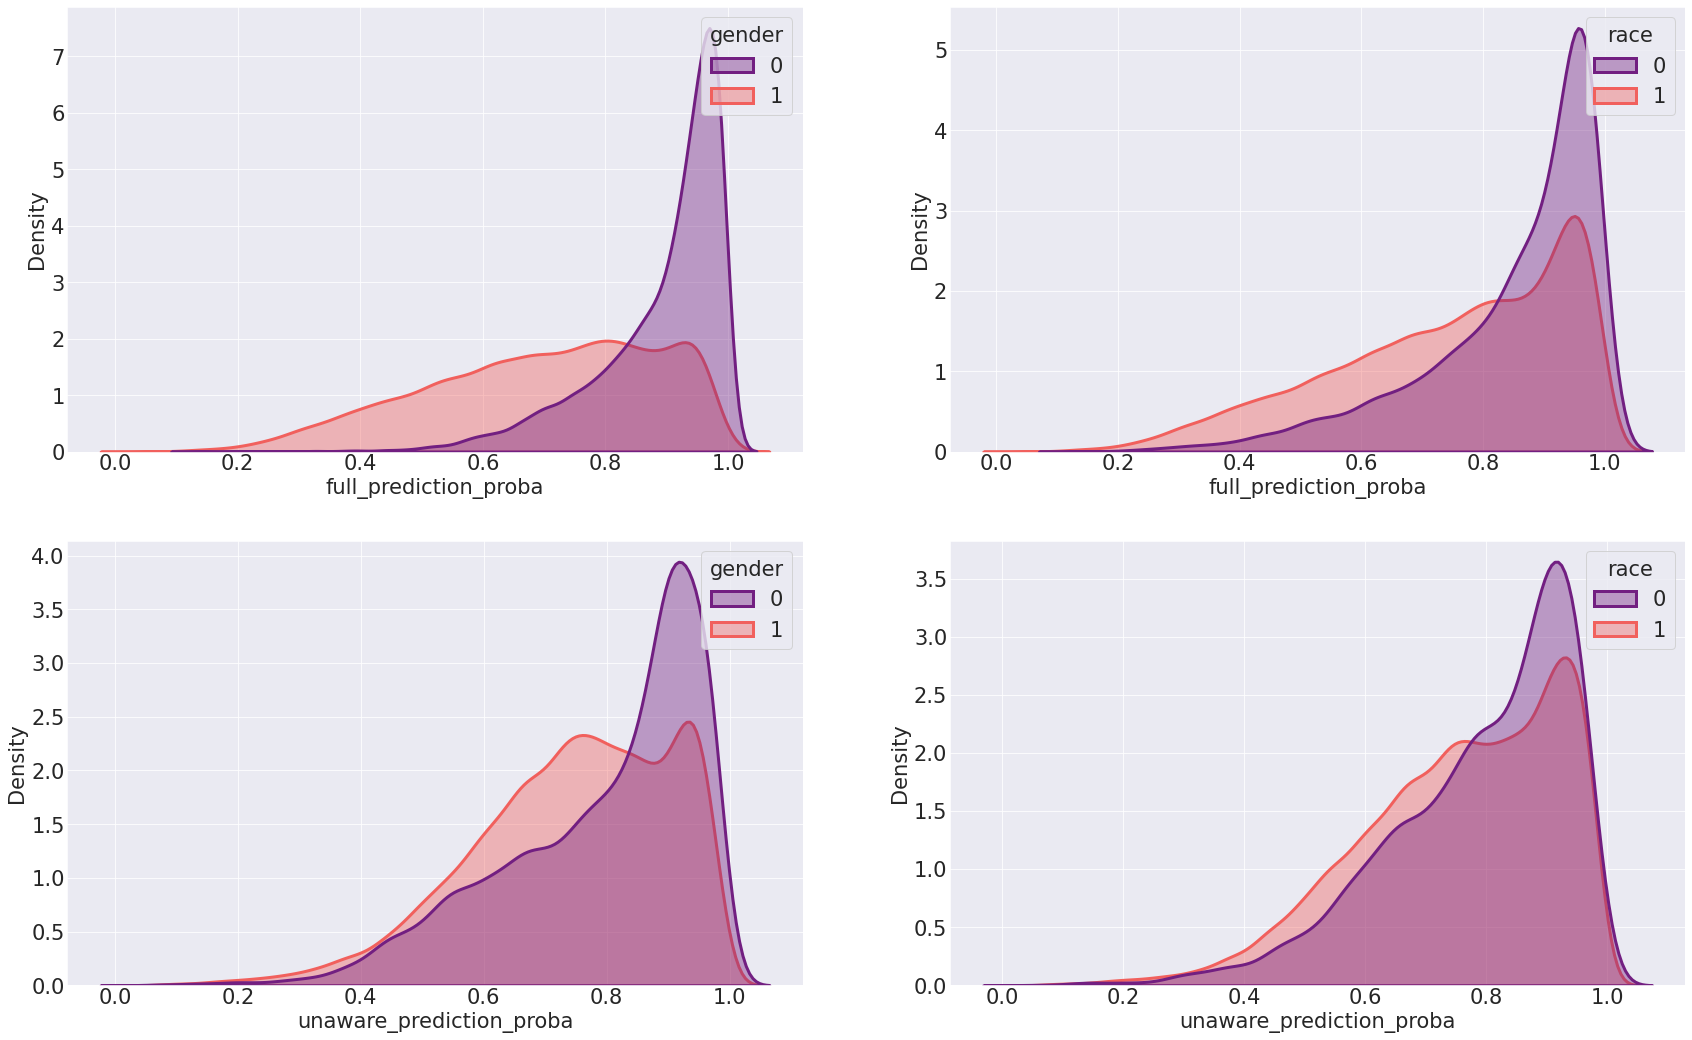

In [38]:
latexify(29,18, font_scale=3)
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.plotting_context("poster", rc={"lines.linewidth": 40})
sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]

alpha = 0.4
linewidth = 3
palette = "magma"

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

plot_distribution(adult_baseline, "full_prediction_proba", "gender", alpha, linewidth, ax1)
plot_distribution(adult_baseline, "full_prediction_proba", "race", alpha, linewidth, ax2)
plot_distribution(adult_baseline, "unaware_prediction_proba", "gender", alpha, linewidth, ax3)
plot_distribution(adult_baseline, "unaware_prediction_proba", "race", alpha, linewidth, ax4)


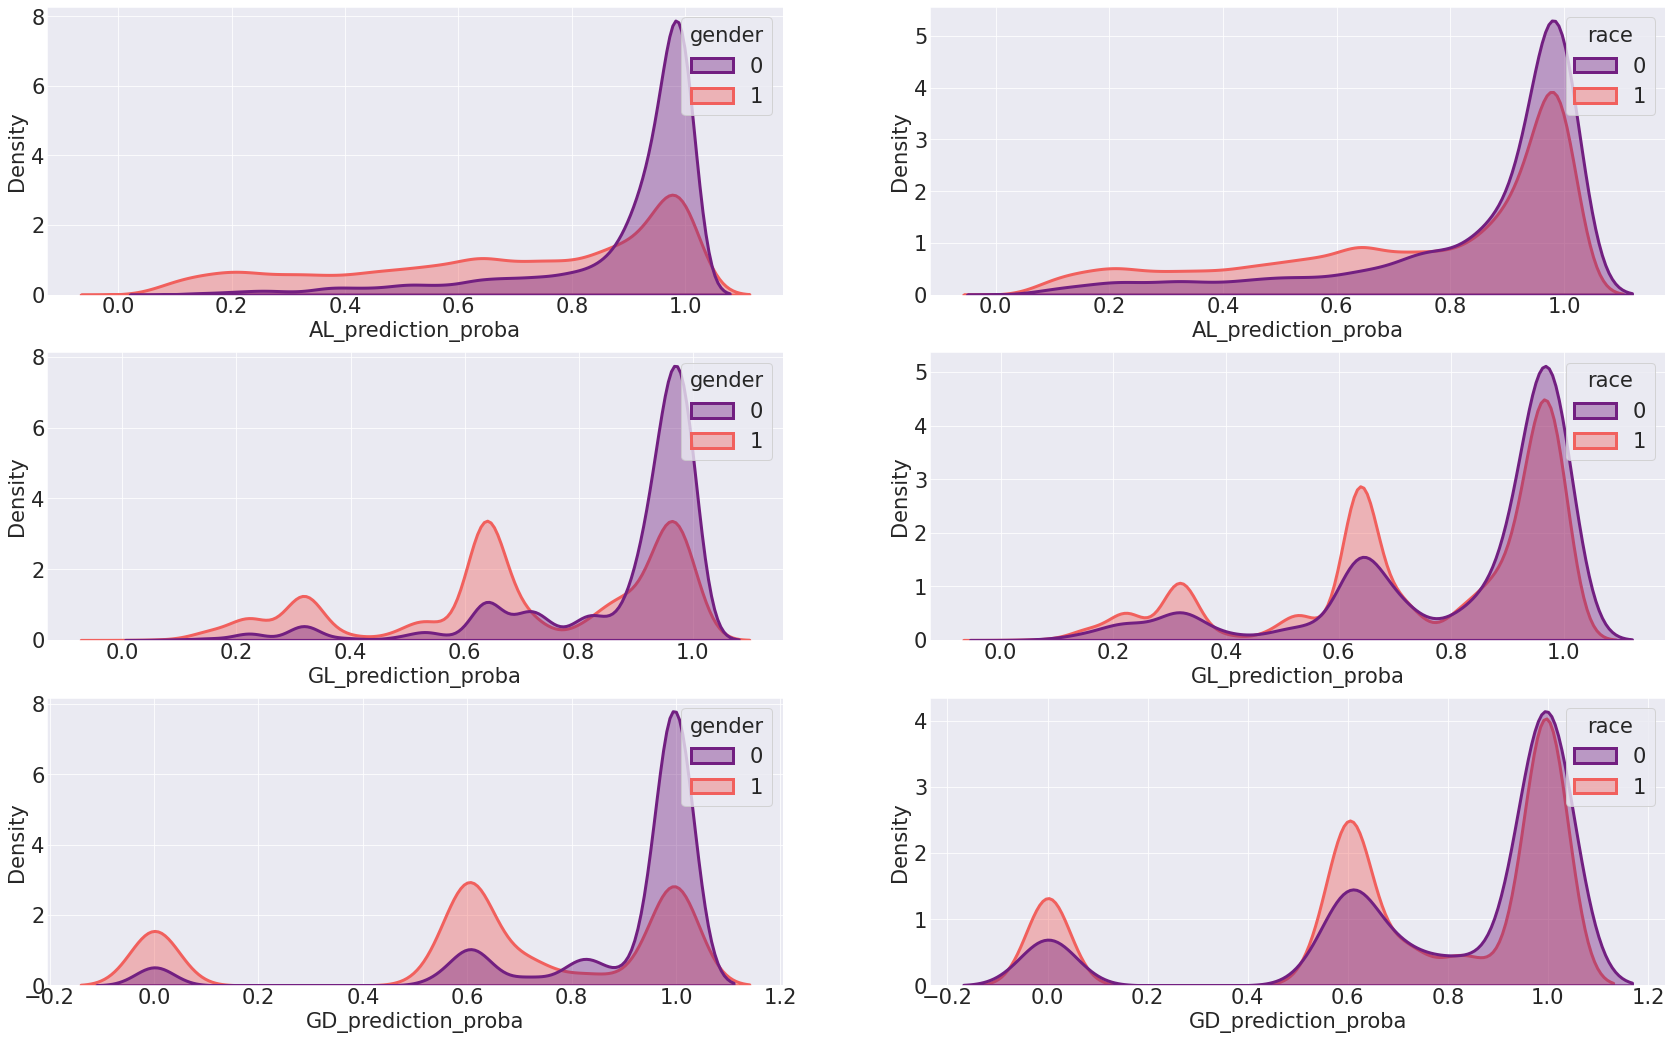

In [39]:
latexify(29,18, font_scale=3)
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.plotting_context("poster", rc={"lines.linewidth": 40})
sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=3, ncols=2)
ax1, ax2, ax3, ax4, ax5, ax6 = axes[0,0], axes[0,1], axes[1,0], axes[1,1], axes[2,0], axes[2,1]

alpha = 0.4
linewidth = 3
palette = "magma"

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

plot_distribution(adult_ivr, "AL_prediction_proba", "gender", alpha, linewidth, ax1)
plot_distribution(adult_ivr, "AL_prediction_proba", "race", alpha, linewidth, ax2)
plot_distribution(adult_ivr, "GL_prediction_proba", "gender", alpha, linewidth, ax3)
plot_distribution(adult_ivr, "GL_prediction_proba", "race", alpha, linewidth, ax4)
plot_distribution(adult_ivr, "GD_prediction_proba", "gender", alpha, linewidth, ax5)
plot_distribution(adult_ivr, "GD_prediction_proba", "race", alpha, linewidth, ax6)


# Compas 

In [126]:
compas_evaluate = pd.read_csv(conf['result_evaluate_compas'])

In [127]:
compas_evaluate

method  Accuracy  F1 Score  Precision    Recall  \
0           full  0.670360  0.666588   0.670491  0.670360   
1        unaware  0.668975  0.664860   0.669296  0.668975   
2            cf1  0.613573  0.593811   0.619507  0.613573   
3            cf2  0.619114  0.608311   0.619963  0.619114   
4  AL_prediction  0.695291  0.693659   0.694792  0.695291   
5  GL_prediction  0.702216  0.699091   0.703149  0.702216   
6  GD_prediction  0.682825  0.678883   0.683684  0.682825   

   average_abs_odds_difference_race  average_abs_odds_difference_sex  \
0                          0.073417                         0.266120   
1                          0.110042                         0.113692   
2                          0.086445                         0.132457   
3                          0.071530                         0.134218   
4                          0.153162                         0.192995   
5                          0.063179                         0.153206   
6                          0.075439                         0.141927   

   equal_opportunity_difference_race  equal_opportunity_difference_sex  \
0                           0.140041                          0.347791   
1                           0.173496                          0.158483   
2                           0.090867                          0.157801   
3                           0.111587                          0.186716   
4                           0.170470                          0.259274   
5                           0.084016                          0.234452   
6                           0.124953                          0.198991   

   generalized_entropy_index_race  generalized_entropy_index_sex  \
0                        0.189277                       0.189277   
1                        0.191429                       0.191429   
2                        0.264828                       0.264828   
3                        0.241047                       0.241047   
4                        0.165738                       0.165738   
5                        0.169497                       0.169497   
6                        0.183265                       0.183265   

   true_positive_rate_difference_race  true_positive_rate_difference_sex  
0                            0.140041                           0.347791  
1                            0.173496                           0.158483  
2                            0.090867                           0.157801  
3                            0.111587                           0.186716  
4                            0.170470                           0.259274  
5                            0.084016                           0.234452  
6                            0.124953                           0.198991

In [106]:
# compas_evaluate.drop(columns = ['sinkhorn', 'energy', 'gaussian', 'laplacian'])

In [107]:
compas_baseline = pd.read_csv(conf['result_compas'])
compas_ivr = pd.read_csv(conf['result_ivr_compas'])


In [110]:
compas_baseline.columns

Index(['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'two_year_recid',
       'full', 'full_proba', 'unaware', 'unaware_proba', 'cf1', 'cf1_proba',
       'cf2', 'cf2_proba'],
      dtype='object')

In [111]:
compas_ivr.columns

Index(['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'two_year_recid',
       'AL_prediction', 'GL_prediction', 'GD_prediction',
       'GD_prediction_proba'],
      dtype='object')

In [112]:
compas_baseline

sex       age  age_cat  race  juv_fel_count  juv_misd_count  \
0      1 -0.573474        0     1              0               0   
1      1 -0.741698        0     1              0               0   
2      1  0.183533        0     1              0               0   
3      1 -0.741698        0     1              0               0   
4      1 -0.405251        0     1              4               0   
..   ...       ...      ...   ...            ...             ...   
717    1  0.772316        0     0              0               0   
718    1 -0.657586        0     1              0               0   
719    0 -0.405251        0     1              0               0   
720    1  1.192876        1     1              0               0   
721    1 -1.246370        2     0              0               0   

     juv_other_count  priors_count  c_charge_degree  two_year_recid  full  \
0                  0             5                0               0     1   
1                  0             1                0               0     0   
2                  0             9                0               0     1   
3                  0             2                0               1     0   
4                  0            12                0               1     1   
..               ...           ...              ...             ...   ...   
717                0             0                1               1     0   
718                0             6                0               1     1   
719                0             8                0               1     1   
720                0             3                0               1     0   
721                0             0                1               1     1   

     full_proba  unaware  unaware_proba  cf1  cf1_proba  cf2  cf2_proba  
0      0.425199        1       0.436005    1   0.447842    1   0.318595  
1      0.557509        0       0.570596    0   0.659220    0   0.606016  
2      0.370155        1       0.377910    1   0.258089    1   0.240471  
3      0.519072        0       0.531804    0   0.629544    1   0.489978  
4      0.128399        1       0.126526    1   0.476280    1   0.418731  
..          ...      ...            ...  ...        ...  ...        ...  
717    0.785527        0       0.798898    0   0.690623    0   0.798680  
718    0.377680        1       0.387642    1   0.383378    1   0.329868  
719    0.402179        1       0.344755    1   0.327909    1   0.395751  
720    0.680528        0       0.689444    0   0.533468    0   0.524857  
721    0.485745        0       0.506769    0   0.692007    0   0.675060  

[722 rows x 18 columns]

In [113]:
compas_ivr

sex       age  age_cat  race  juv_fel_count  juv_misd_count  \
0      1 -0.573474        0     1              0               0   
1      1 -0.741698        0     1              0               0   
2      1  0.183533        0     1              0               0   
3      1 -0.741698        0     1              0               0   
4      1 -0.405251        0     1              4               0   
..   ...       ...      ...   ...            ...             ...   
717    1  0.772316        0     0              0               0   
718    1 -0.657586        0     1              0               0   
719    0 -0.405251        0     1              0               0   
720    1  1.192876        1     1              0               0   
721    1 -1.246370        2     0              0               0   

     juv_other_count  priors_count  c_charge_degree  two_year_recid  \
0                  0             5                0             0.0   
1                  0             1                0             0.0   
2                  0             9                0             0.0   
3                  0             2                0             1.0   
4                  0            12                0             1.0   
..               ...           ...              ...             ...   
717                0             0                1             1.0   
718                0             6                0             1.0   
719                0             8                0             1.0   
720                0             3                0             1.0   
721                0             0                1             1.0   

     AL_prediction  GL_prediction  GD_prediction  GD_prediction_proba  
0              1.0            1.0              1             0.079939  
1              0.0            0.0              0             0.642826  
2              1.0            1.0              1             0.014989  
3              1.0            0.0              0             0.527666  
4              1.0            1.0              1             0.005136  
..             ...            ...            ...                  ...  
717            0.0            0.0              0             0.795413  
718            1.0            1.0              1             0.015087  
719            1.0            1.0              1             0.008617  
720            0.0            0.0              0             0.739301  
721            1.0            1.0              1             0.361167  

[722 rows x 14 columns]

In [101]:
compas_baseline.race.value_counts()

1    415
0    203
Name: race, dtype: int64

In [102]:
compas_ivr

c_charge_degree  age_cat  race  gender  score_text  priors_count  \
0                  1        0     0       1           1     -0.684358   
1                  1        1     1       1           1     -0.262752   
2                  1        0     0       1           1      0.369656   
3                  1        0     1       1           2      1.002065   
4                  1        0     1       1           2     -0.262752   
..               ...      ...   ...     ...         ...           ...   
613                0        0     1       0           2      2.477685   
614                1        0     0       1           2     -0.473555   
615                1        0     1       1           1     -0.684358   
616                0        1     1       1           1     -0.051949   
617                1        2     1       0           2     -0.684358   

     two_year_recid  AL_prediction  AL_prediction_proba  GL_prediction  \
0               1.0            0.0             0.766350            0.0   
1               1.0            0.0             0.694656            0.0   
2               1.0            0.0             0.602563            1.0   
3               1.0            1.0             0.364943            1.0   
4               0.0            1.0             0.455249            0.0   
..              ...            ...                  ...            ...   
613             1.0            1.0             0.267617            1.0   
614             0.0            1.0             0.454102            0.0   
615             0.0            0.0             0.766405            0.0   
616             1.0            0.0             0.744424            0.0   
617             0.0            1.0             0.455262            1.0   

     GL_prediction_proba  GD_prediction  GD_prediction_proba  
0               0.704034              0             0.919726  
1               0.818486              0             0.898263  
2               0.224479              0             0.504369  
3               0.189651              1             0.050992  
4               0.727113              1             0.469317  
..                   ...            ...                  ...  
613             0.225661              1             0.052296  
614             0.680412              0             0.505547  
615             0.704034              0             0.919726  
616             0.639586              0             0.727510  
617             0.328387              0             0.520842  

[618 rows x 13 columns]

Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.


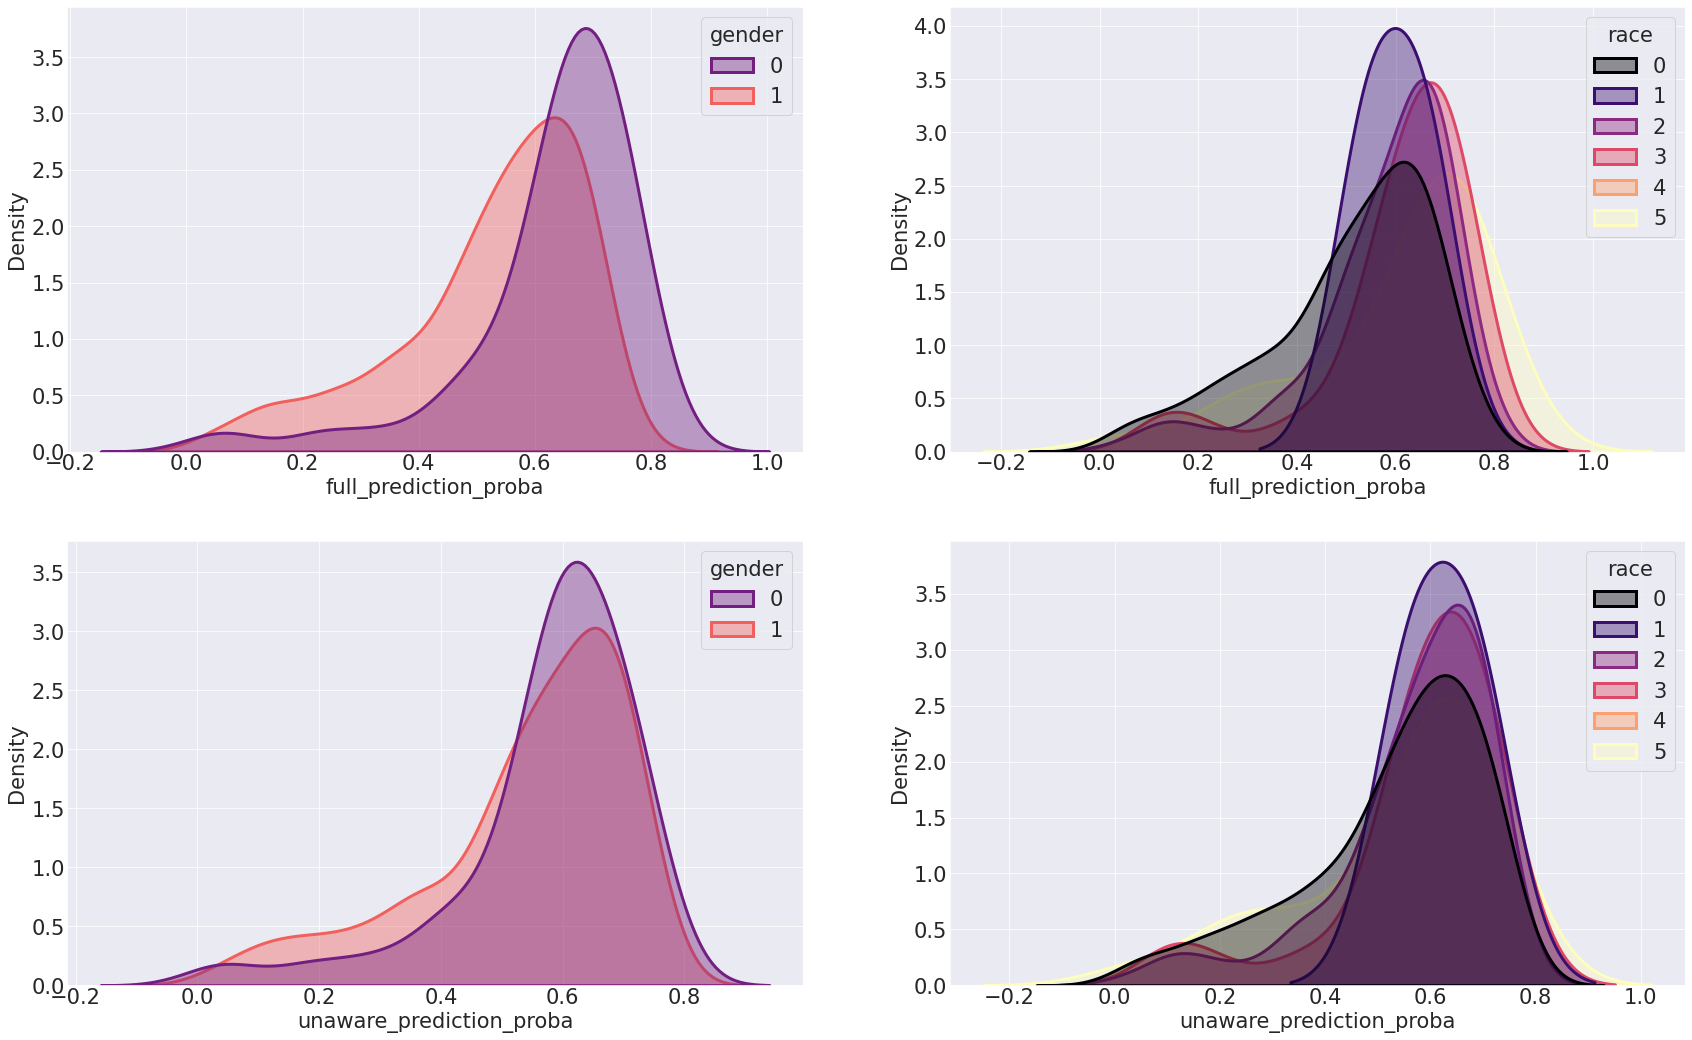

In [47]:
latexify(29,18, font_scale=3)
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.plotting_context("poster", rc={"lines.linewidth": 40})
sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]

alpha = 0.4
linewidth = 3
palette = "magma"

axes = [ax1, ax2, ax3, ax4]

plot_distribution(compas_baseline, "full_prediction_proba", "gender", alpha, linewidth, ax1)
plot_distribution(compas_baseline, "full_prediction_proba", "race", alpha, linewidth, ax2)
plot_distribution(compas_baseline, "unaware_prediction_proba", "gender", alpha, linewidth, ax3)
plot_distribution(compas_baseline, "unaware_prediction_proba", "race", alpha, linewidth, ax4)


Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.
Dataset has 0 variance; skipping density estimate.


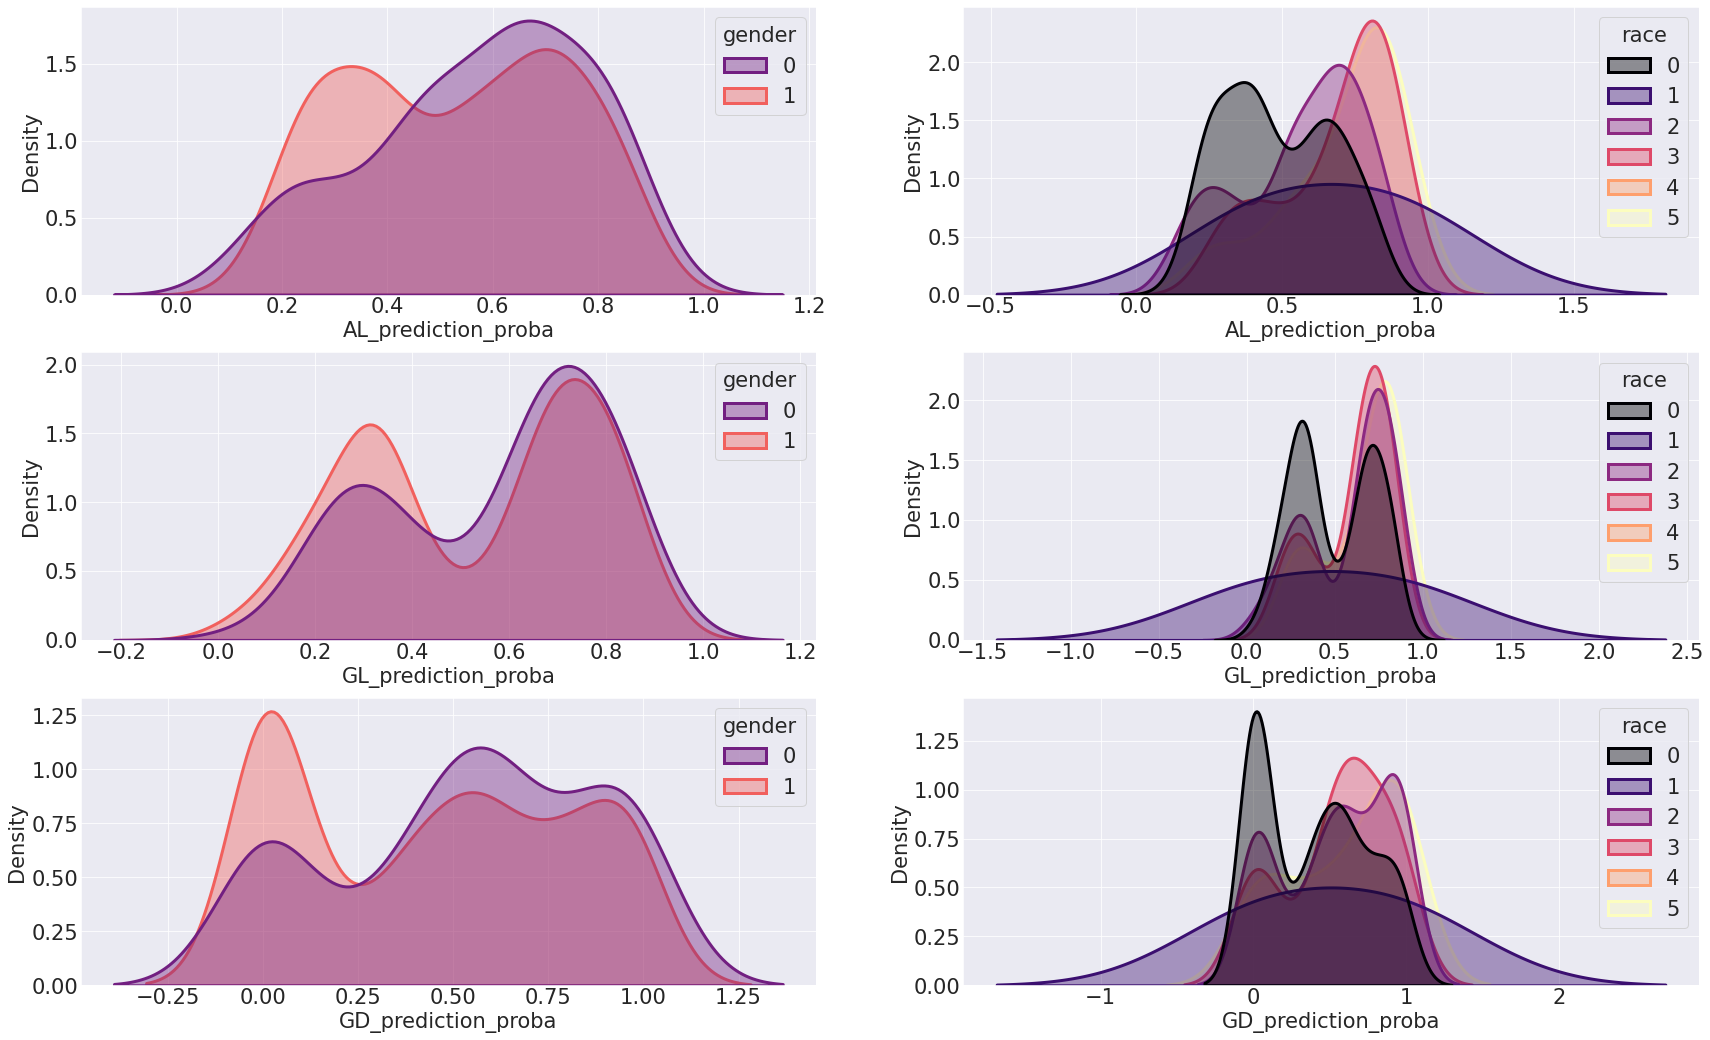

In [48]:
latexify(29,18, font_scale=3)
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.plotting_context("poster", rc={"lines.linewidth": 40})
sns.set_style("darkgrid")

fig, axes = plt.subplots(nrows=3, ncols=2)
ax1, ax2, ax3, ax4, ax5, ax6 = axes[0,0], axes[0,1], axes[1,0], axes[1,1], axes[2,0], axes[2,1]

alpha = 0.4
linewidth = 3
palette = "magma"

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

plot_distribution(compas_ivr, "AL_prediction_proba", "gender", alpha, linewidth, ax1)
plot_distribution(compas_ivr, "AL_prediction_proba", "race", alpha, linewidth, ax2)
plot_distribution(compas_ivr, "GL_prediction_proba", "gender", alpha, linewidth, ax3)
plot_distribution(compas_ivr, "GL_prediction_proba", "race", alpha, linewidth, ax4)
plot_distribution(compas_ivr, "GD_prediction_proba", "gender", alpha, linewidth, ax5)
plot_distribution(compas_ivr, "GD_prediction_proba", "race", alpha, linewidth, ax6)


# Bank

In [56]:
bank = pd.read_csv(conf['result_evaluate_bank'])

In [57]:
bank

method  Accuracy  F1 Score  Precision    Recall  \
0     full_prediction  0.767234  0.766291   0.767545  0.767234   
1  unaware_prediction  0.769024  0.768319   0.769052  0.769024   

   average_abs_odds_difference_marital  equal_opportunity_difference_marital  \
0                             0.047855                             -0.037822   
1                             0.045737                              0.046931   

   generalized_entropy_index_marital  true_positive_rate_difference_marital  
0                           0.124892                              -0.037822  
1                           0.122360                               0.046931

In [58]:
bank_baseline = pd.read_csv(conf['result_bank'])

In [59]:
bank_baseline

Unnamed: 0       age  job  marital  education default    balance  \
0           9058 -0.019470    7        1          3      no  -0.446621   
1           3279  1.239620    9        1          1      no   0.126949   
2           6502 -0.942802    7        2          1      no  -0.397945   
3           9327 -0.607045    4        2          2      no  -0.041092   
4           9965 -1.026741    9        2          1      no  -0.477935   
...          ...       ...  ...      ...        ...     ...        ...   
1112        6900  0.316288    4        1          1      no  -0.467394   
1113         836 -0.942802    7        2          2      no  -0.621793   
1114        7859 -0.019470    1        1          1      no  -0.443831   
1115       10143  0.148409    0        2          1      no  17.145853   
1116        6163 -0.187348    4        1          0      no  -0.473905   

      housing  loan   contact  ...  duration campaign  pdays  previous  \
0           1     0  cellular  ... -0.769150        1    336  0.509354   
1           0     1  cellular  ... -0.411934        1    192  1.381952   
2           0     1  cellular  ... -0.532926        2     -1 -0.363244   
3           1     0  cellular  ...  0.743259        1     -1 -0.363244   
4           1     0  cellular  ...  0.403327        3     -1 -0.363244   
...       ...   ...       ...  ...       ...      ...    ...       ...   
1112        1     0   unknown  ...  1.198422        2     -1 -0.363244   
1113        0     1  cellular  ...  3.341721        2     -1 -0.363244   
1114        0     1  cellular  ... -0.460907        2     -1 -0.363244   
1115        0     0   unknown  ... -0.371603        1     -1 -0.363244   
1116        0     0   unknown  ... -0.184352        7     -1 -0.363244   

      poutcome  deposit  full_prediction  full_prediction_proba  \
0            0        0                0               0.676717   
1            2        1                0               0.531793   
2            3        0                0               0.759755   
3            3        0                1               0.301579   
4            3        0                0               0.505807   
...        ...      ...              ...                    ...   
1112         3        0                1               0.234554   
1113         3        1                1               0.003056   
1114         3        0                0               0.776150   
1115         3        0                1               0.129407   
1116         3        0                0               0.579092   

      unaware_prediction  unaware_prediction_proba  
0                      0                  0.664756  
1                      0                  0.538018  
2                      0                  0.778954  
3                      1                  0.328772  
4                      0                  0.532075  
...                  ...                       ...  
1112                   1                  0.233763  
1113                   1                  0.003392  
1114                   0                  0.771889  
1115                   1                  0.140549  
1116                   0                  0.567672  

[1117 rows x 22 columns]